# Setup

## Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from cycler import cycle

import qutip as qp

import scqubits as scq

import xarray as xr


import scipy.linalg as la
import scipy.optimize as opt
import scipy.fft as fft

import colormaps as cmaps
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

import itertools as itert

import IPython.display

import sys

import copy

import pickle

import json

import pathlib

import os

import inspect

from datetime import datetime


path_to_package = str(pathlib.Path(os.getcwd()).parents[0])+'/Main Package/'
print(path_to_package)
sys.path.insert(0,path_to_package)

main_path = str(pathlib.Path(os.getcwd()).parents[0])+'/'

import importlib

import Transmon_Cavity_Model as TCM

/local/gr400/Git Repositories/CavityModeDriveSimulations/Main Package/


In [6]:
importlib.reload(TCM)

<module 'Transmon_Cavity_Model' from '/local/gr400/Git Repositories/CavityModeDriveSimulations/Main Package/Transmon_Cavity_Model.py'>

## Other Stuff

In [3]:
Transmon_Labels_LK = {'g':0, 'e':1, 'f':2, 'h':3, 'i':4, 'j':5, 'k':6, 'l':7,'m':8, 'o':9, 'p':10}

Transmon_Labels_NK = {}
for  i,key in enumerate(Transmon_Labels_LK):
    Transmon_Labels_NK[i]=key

# Importing Model

In [10]:
model_name = 'Mode_3_And_5'
save_path = 'Model Saves/'+model_name
save_path = main_path+save_path + '/'

Mode35 = TCM.LoadModel(save_path+model_name+'.json')

In [11]:
model_name = 'Mode_3'
save_path = 'Model Saves/'+model_name
save_path = main_path+save_path + '/'

Mode3 = TCM.LoadModel(save_path+model_name+'.json')

model_name = 'Mode_5'
save_path = 'Model Saves/'+model_name
save_path = main_path+save_path + '/'

Mode5 = TCM.LoadModel(save_path+model_name+'.json')


# Calibrating Pulses

## Qubit Pulses

### q_ge

In [8]:
Mode3.op_drive_params_dict['q_g_0']

{'Envelope': 'Guassian',
 'shift': 0,
 'epsilon': 0.005,
 'Envelope Args': {'sigma': 25.5, 'mu': 51.0},
 'freq_d': 4.6037423584481445,
 'pulse_time': 100.2}

In [9]:
g00 = ['g', 0, 0]
e00 = ['e', 0, 0]
g00_op_name = 'q_g_00'
g00_epsilon = 0.0055

Odeoptions = {'nsteps': 10000, 'max_step':1, 'atol':1e-6, 'rtol':1e-6}#, 'method':'bdf'}
solver_ops = qp.Options(**Odeoptions)

Doing step 1/31, t = 85.0
10.0%. Run time:   2.15s. Est. time left: 00:00:00:19
20.0%. Run time:   4.25s. Est. time left: 00:00:00:17
30.0%. Run time:   6.34s. Est. time left: 00:00:00:14
40.0%. Run time:   8.47s. Est. time left: 00:00:00:12
50.0%. Run time:  10.58s. Est. time left: 00:00:00:10
60.0%. Run time:  12.66s. Est. time left: 00:00:00:08
70.0%. Run time:  14.70s. Est. time left: 00:00:00:06
80.0%. Run time:  16.65s. Est. time left: 00:00:00:04
90.0%. Run time:  18.51s. Est. time left: 00:00:00:02
Total run time:  20.31s
Transition prob: 0.9882530230093963
-----------------------------------------------------------------

Doing step 2/31, t = 85.33333333333333
10.0%. Run time:   2.07s. Est. time left: 00:00:00:18
20.0%. Run time:   4.15s. Est. time left: 00:00:00:16
30.0%. Run time:   6.24s. Est. time left: 00:00:00:14
40.0%. Run time:   8.32s. Est. time left: 00:00:00:12
50.0%. Run time:  10.39s. Est. time left: 00:00:00:10
60.0%. Run time:  12.41s. Est. time left: 00:00:00:0

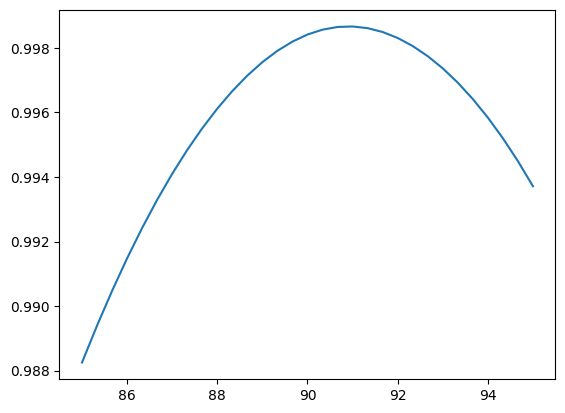

In [10]:
op_name_temp = g00_op_name
args = {'Envelope': 'Guassian', 'shift': 0, 'epsilon':g00_epsilon}


#print(op_name_temp)
kwargs = {'save_pulse':True}
Mode35.CalibratePulse('Guassian', g00, e00, args,  85, 95, 31, op_name_temp, kwargs = kwargs)
print(Mode35.op_drive_params_dict[op_name_temp])

### q_ef

In [20]:
Mode3.op_drive_params_dict['q_e_0']

{'Envelope': 'Guassian',
 'shift': 0,
 'epsilon': 0.005,
 'Envelope Args': {'sigma': 18.5, 'mu': 37.0},
 'freq_d': 4.495496169774029,
 'pulse_time': 71.6}

In [13]:
e00 = ['e', 0, 0]
f00 = ['f', 0, 0]
e00_op_name = 'q_e_00'
e00_epsilon = 0.0055/np.sqrt(2)

Odeoptions = {'nsteps': 10000, 'max_step':1, 'atol':1e-6, 'rtol':1e-6}#, 'method':'bdf'}
solver_ops = qp.Options(**Odeoptions)

Doing step 1/31, t = 90.0
10.0%. Run time:   1.89s. Est. time left: 00:00:00:16
20.0%. Run time:   3.79s. Est. time left: 00:00:00:15
30.0%. Run time:   5.66s. Est. time left: 00:00:00:13
40.0%. Run time:   7.52s. Est. time left: 00:00:00:11
50.0%. Run time:   9.38s. Est. time left: 00:00:00:09
60.0%. Run time:  11.20s. Est. time left: 00:00:00:07
70.0%. Run time:  12.97s. Est. time left: 00:00:00:05
80.0%. Run time:  14.66s. Est. time left: 00:00:00:03
90.0%. Run time:  16.29s. Est. time left: 00:00:00:01
Total run time:  17.86s
Transition prob: 0.9984584796769348
-----------------------------------------------------------------

Doing step 2/31, t = 90.13333333333334
10.0%. Run time:   1.88s. Est. time left: 00:00:00:16
20.0%. Run time:   3.74s. Est. time left: 00:00:00:14
30.0%. Run time:   5.62s. Est. time left: 00:00:00:13
40.0%. Run time:   7.47s. Est. time left: 00:00:00:11
50.0%. Run time:   9.32s. Est. time left: 00:00:00:09
60.0%. Run time:  11.13s. Est. time left: 00:00:00:0

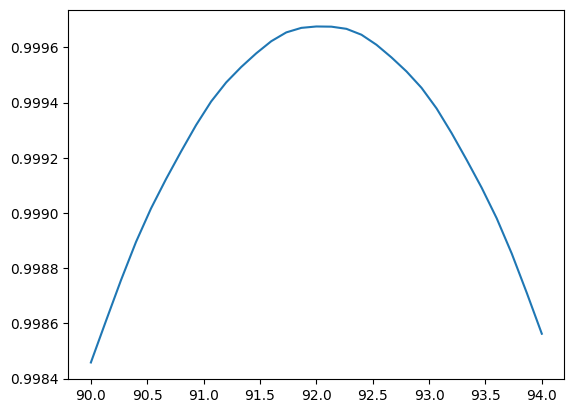

In [14]:
op_name_temp = e00_op_name
args = {'Envelope': 'Guassian', 'shift': 0, 'epsilon':e00_epsilon, 'freq_d':Mode35.DefaultFrequency(['e',0,0], ['f',0,0])}


#print(op_name_temp)
kwargs = {'save_pulse':True}
Mode35.CalibratePulse('Guassian', e00, f00, args,  90, 94, 31, op_name_temp, kwargs = kwargs)
print(Mode35.op_drive_params_dict[op_name_temp])

### half-q_e_00

In [20]:
Mode3.op_drive_params_dict['half_q_e_0_Long']

{'Envelope': 'Guassian',
 'shift': 0,
 'epsilon': 0.0035,
 'freq_d': 4.495496169774029,
 'phi': 0,
 'pulse_time': 51.495,
 'Envelope Args': {'sigma': 12.9, 'mu': 25.8}}

In [41]:
half_e00_op_name = 'half-q_e_00'
half_e00_epsilon = 0.0055/np.sqrt(2)

Odeoptions = {'nsteps': 1000000, 'max_step':1/1000, 'atol':1e-14, 'rtol':1e-14}
solver_ops = qp.Options(**Odeoptions)

Doing step 1/101, t = 46.0
10.0%. Run time:   0.97s. Est. time left: 00:00:00:08
20.0%. Run time:   1.93s. Est. time left: 00:00:00:07
30.0%. Run time:   2.94s. Est. time left: 00:00:00:06
40.0%. Run time:   3.91s. Est. time left: 00:00:00:05
50.0%. Run time:   4.88s. Est. time left: 00:00:00:04
60.0%. Run time:   5.82s. Est. time left: 00:00:00:03
70.0%. Run time:   6.77s. Est. time left: 00:00:00:02
80.0%. Run time:   7.71s. Est. time left: 00:00:00:01
90.0%. Run time:   8.64s. Est. time left: 00:00:00:00
Total run time:   9.55s
Transition prob: 0.5382638709536063
-----------------------------------------------------------------

Doing step 2/101, t = 46.002
10.0%. Run time:   0.96s. Est. time left: 00:00:00:08
20.0%. Run time:   1.92s. Est. time left: 00:00:00:07
30.0%. Run time:   2.88s. Est. time left: 00:00:00:06
40.0%. Run time:   3.83s. Est. time left: 00:00:00:05
50.0%. Run time:   4.77s. Est. time left: 00:00:00:04
60.0%. Run time:   5.71s. Est. time left: 00:00:00:03
70.0%. 

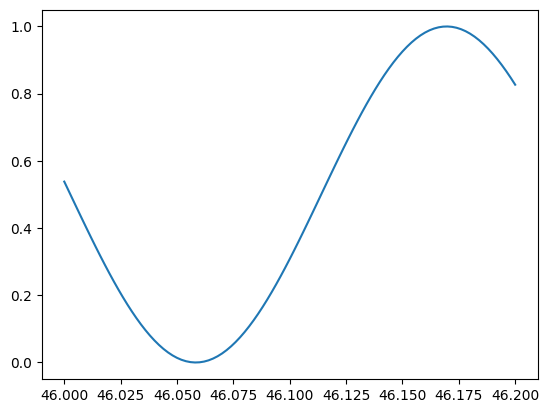

In [91]:
psi_init = ['e',0,0]
psi_final = Mode35.get_dressed_state(['e',0,0])+Mode35.get_dressed_state(['f',0,0])
psi_final = psi_final/psi_final.norm()

op_name_temp = half_e00_op_name

args = {'Envelope': 'Guassian', 'shift':0, 'freq_d':Mode35.DefaultFrequency(['e',0,0], ['f',0,0]), 'epsilon':half_e00_epsilon}

kwargs = {'save_pulse':True}
#Mode35.CalibratePulse('Guassian', psi_init, psi_final, args,   51.475,51.55, 31, op_name_temp, kwargs = kwargs)
#Mode35.CalibratePulse('Guassian', psi_init, psi_final, args,   48.835, 48.845, 11, op_name_temp, kwargs = kwargs)
Mode35.CalibratePulse('Guassian', psi_init, psi_final, args,   46, 46.2, 101, op_name_temp, kwargs = kwargs)
print(Mode35.op_drive_params_dict[op_name_temp])

## Sidebands

### f0g1

#### Mode 3

Target Time: 178.77ns

In [52]:
Mode3.op_drive_params_dict['sb_f_0_Main']

{'Envelope': 'Sine_Squared_Ramp',
 'shift': 0.05303586333437701,
 'epsilon': 0.88,
 'Envelope Args': {'ramp_time': 10, 'pulse_time': 177.8},
 'freq_d': -2.870147109080264,
 'pulse_time': 177.8}

In [43]:
f0_Mode_3 = ['f', 0, 0]
g1_Mode_3 = ['g', 1, 0]
f0g1_Mode_3_op_name = 'sb_f_0_Mode_3'
f0g1_Mode_3_epsilon = 0.78

Odeoptions = {'nsteps': 10000, 'max_step':1, 'atol':1e-6, 'rtol':1e-6}#, 'method':'bdf'}
solver_ops = qp.Options(**Odeoptions)
kwargs = {'shifts':np.linspace(0.03, 0.08, 11), 'show_plot':True, 'options': solver_ops}

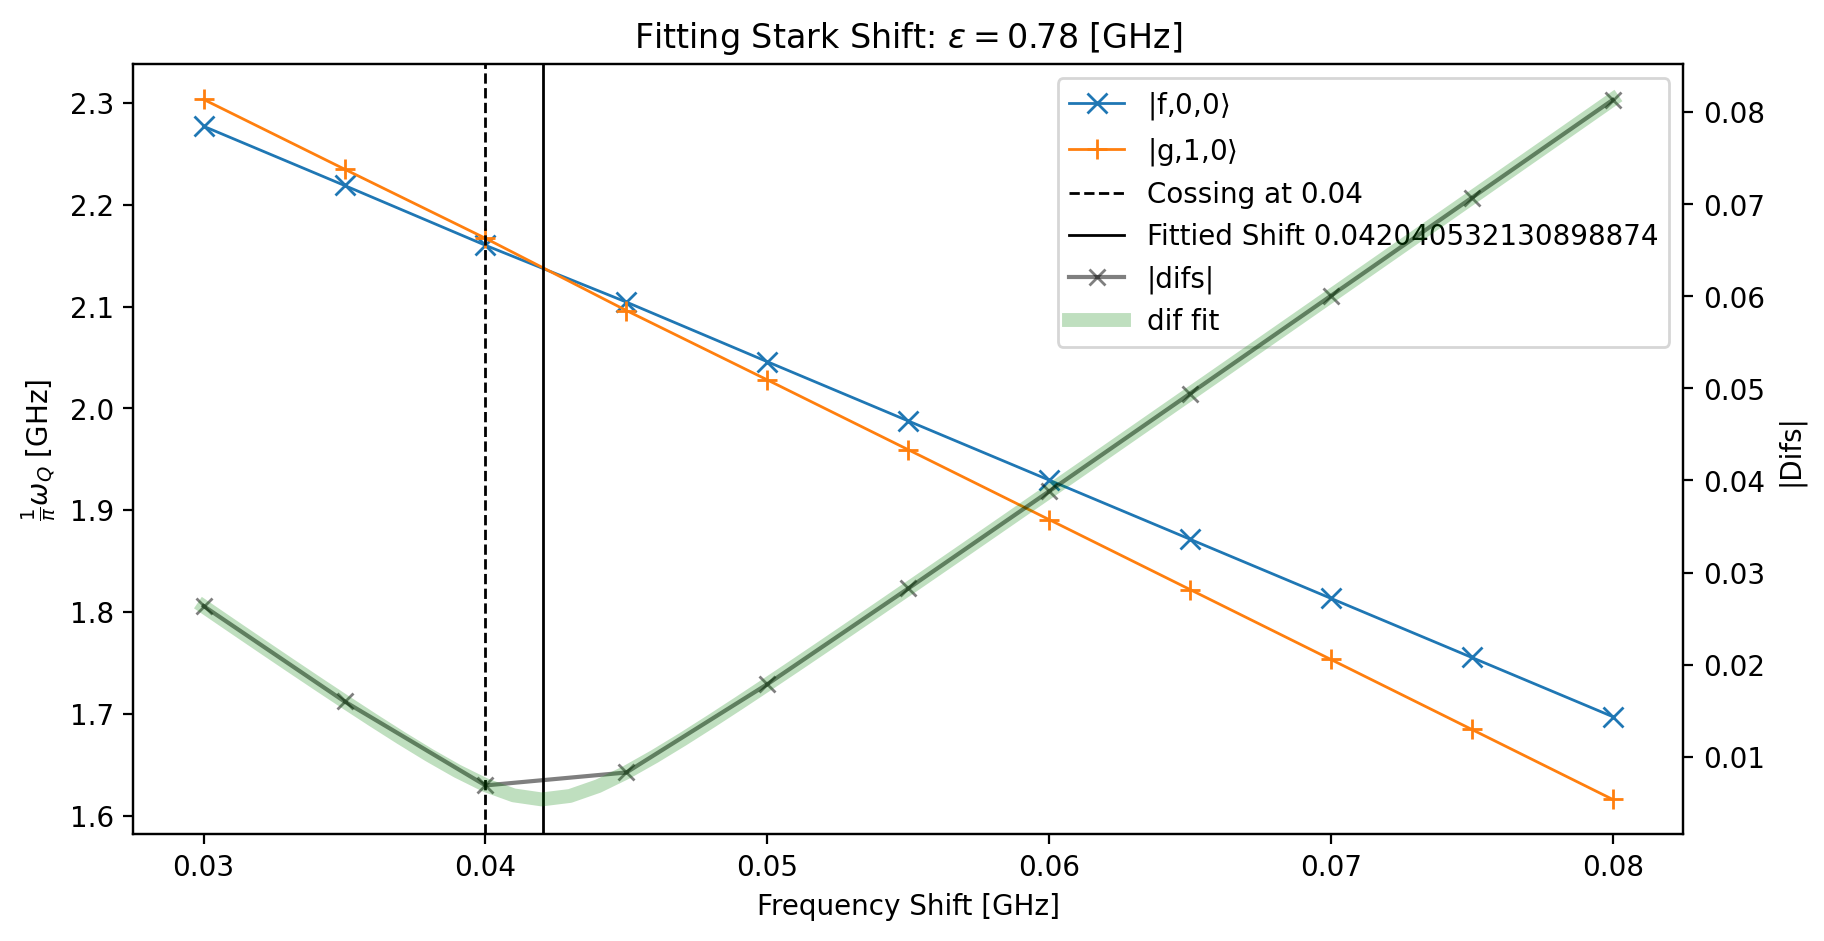

stark shift: 0.042040532130898874
Initial Drive Time: 186.71735243249864


In [44]:
f0g1_StarkShift_Mode3 = Mode35.GetStarkShift(f0_Mode_3, g1_Mode_3, f0g1_Mode_3_epsilon, use_fit = False, kwargs = kwargs)
starkshift = f0g1_StarkShift_Mode3['x'][0]
initial_time = 1/f0g1_StarkShift_Mode3['fun']
print(f'stark shift: {starkshift}')
print(f'Initial Drive Time: {initial_time}')

Doing step 1/31, t = 185.0


10.0%. Run time:   3.53s. Est. time left: 00:00:00:31
20.0%. Run time:   7.21s. Est. time left: 00:00:00:28
30.0%. Run time:  10.85s. Est. time left: 00:00:00:25
40.0%. Run time:  14.55s. Est. time left: 00:00:00:21
50.0%. Run time:  18.24s. Est. time left: 00:00:00:18
60.0%. Run time:  22.13s. Est. time left: 00:00:00:14
70.0%. Run time:  25.84s. Est. time left: 00:00:00:11
80.0%. Run time:  29.60s. Est. time left: 00:00:00:07
90.0%. Run time:  33.29s. Est. time left: 00:00:00:03
Total run time:  37.05s
Transition prob: 0.9870622673986112
-----------------------------------------------------------------

Doing step 2/31, t = 185.83333333333334
10.0%. Run time:   3.57s. Est. time left: 00:00:00:32
20.0%. Run time:   7.26s. Est. time left: 00:00:00:29
30.0%. Run time:  10.94s. Est. time left: 00:00:00:25
40.0%. Run time:  14.68s. Est. time left: 00:00:00:22
50.0%. Run time:  18.42s. Est. time left: 00:00:00:18
60.0%. Run time:  22.17s. Est. time left: 00:00:00:14
70.0%. Run time:  25.95

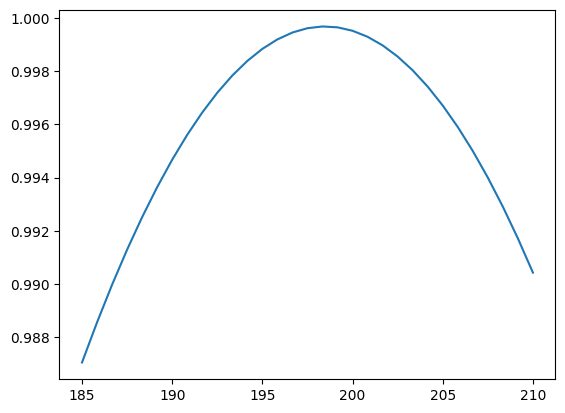

In [45]:
op_name_temp = f0g1_Mode_3_op_name
args = {'Envelope': 'Sine_Squared_Ramp', 'shift': f0g1_StarkShift_Mode3['x'][0], 'epsilon':f0g1_Mode_3_epsilon}


args['Envelope Args'] = {'ramp_time':10}#, 'sigma_factor':2}



#print(op_name_temp)
kwargs = {'save_pulse':True}
Mode35.CalibratePulse('Ramped', f0_Mode_3, g1_Mode_3, args,  185, 210, 31, op_name_temp, kwargs = kwargs)
print(Mode35.op_drive_params_dict[op_name_temp])

#### Mode 5

Target Time: 179.87ns

In [ ]:
Mode5.op_drive_params_dict['sb_f_0_Main']

{'Envelope': 'Sine_Squared_Ramp',
 'shift': 0.05957495001747806,
 'epsilon': 1.38,
 'Envelope Args': {'ramp_time': 10, 'pulse_time': 179.35},
 'freq_d': -2.3774580567588544,
 'pulse_time': 179.35}

In [6]:
f0_Mode_5 = ['f', 0, 0]
g1_Mode_5 = ['g', 0, 1]

f0g1_Mode_5_op_name = 'sb_f_0_Mode_5'

f0g1_Mode_5_epsilon = 1.23

Odeoptions = {'nsteps': 10000, 'max_step':1, 'atol':1e-6, 'rtol':1e-6}#, 'method':'bdf'}
solver_ops = qp.Options(**Odeoptions)
kwargs = {'shifts':np.linspace(0.03, 0.08, 11), 'show_plot':True, 'options': solver_ops}

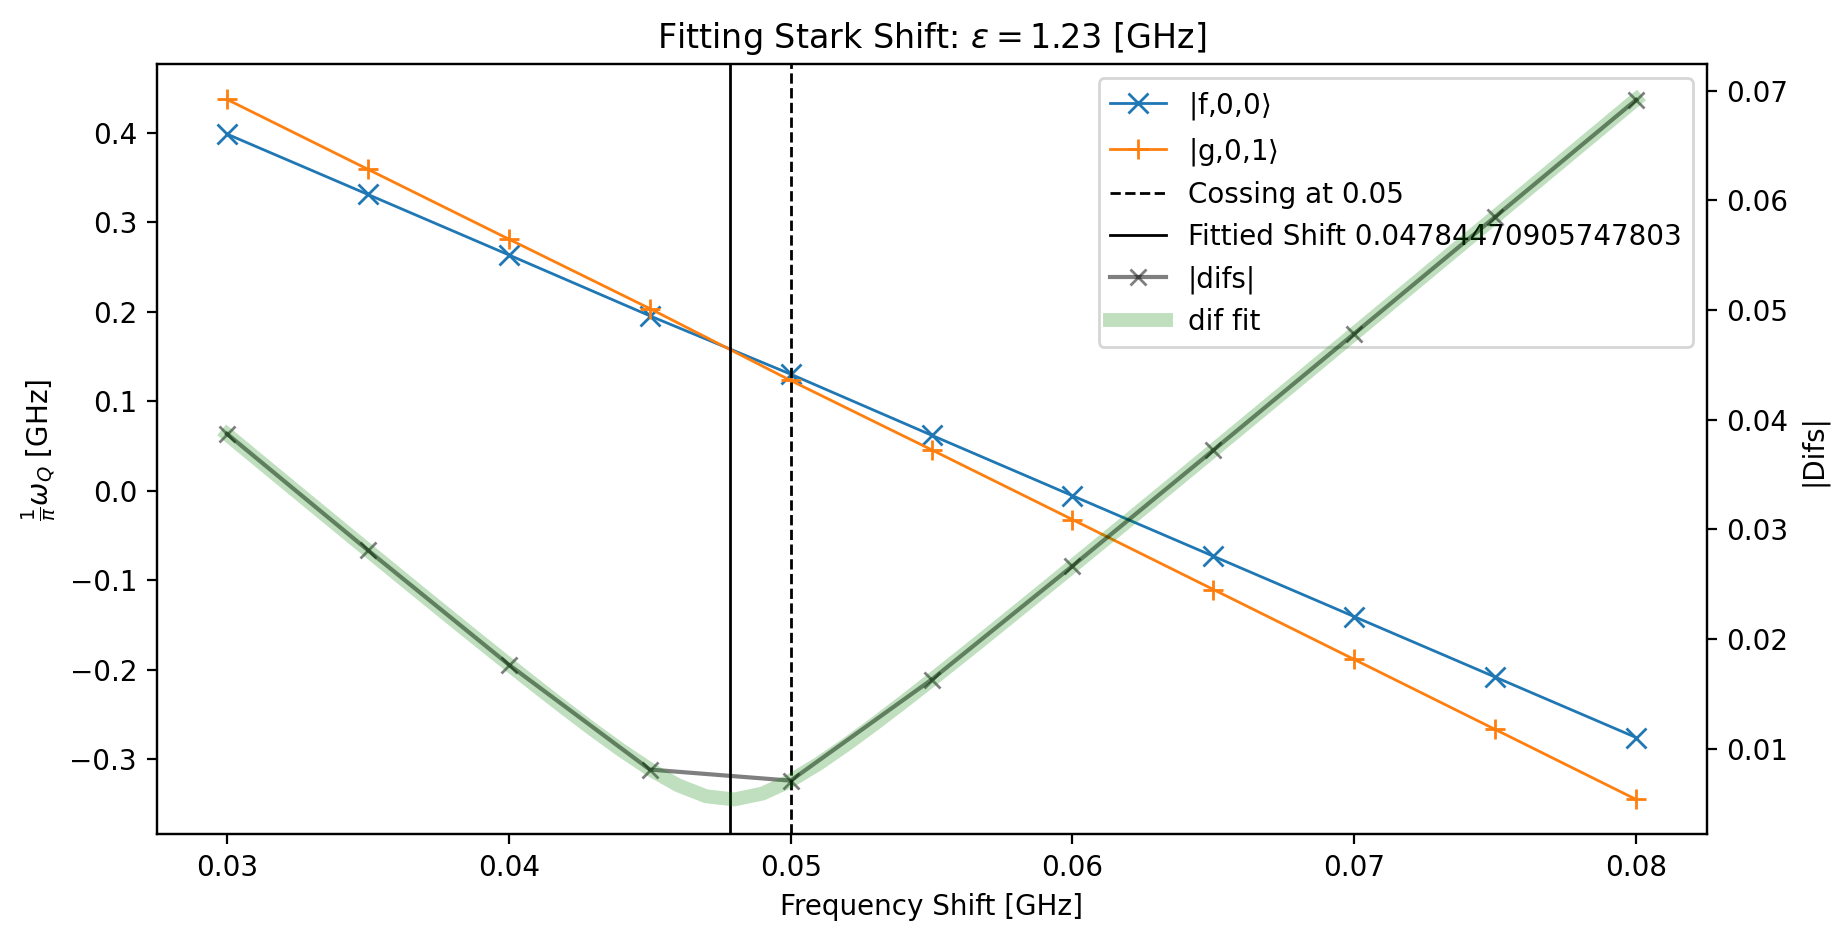

stark shift: 0.04784470905747803
Initial Drive Time: 187.00429484026975


In [8]:
f0g1_StarkShift_Mode5 = Mode35.GetStarkShift(f0_Mode_5, g1_Mode_5, f0g1_Mode_5_epsilon, use_fit = False, kwargs = kwargs)
starkshift = f0g1_StarkShift_Mode5['x'][0]
initial_time = 1/f0g1_StarkShift_Mode5['fun']
print(f'stark shift: {starkshift}')
print(f'Initial Drive Time: {initial_time}')

Doing step 1/11, t = 195.0
10.0%. Run time:   3.91s. Est. time left: 00:00:00:35
20.0%. Run time:   7.84s. Est. time left: 00:00:00:31
30.0%. Run time:  11.83s. Est. time left: 00:00:00:27
40.0%. Run time:  15.82s. Est. time left: 00:00:00:23
50.0%. Run time:  19.83s. Est. time left: 00:00:00:19
60.0%. Run time:  23.84s. Est. time left: 00:00:00:15
70.0%. Run time:  27.84s. Est. time left: 00:00:00:11
80.0%. Run time:  31.94s. Est. time left: 00:00:00:07
90.0%. Run time:  35.97s. Est. time left: 00:00:00:03
Total run time:  40.14s
Transition prob: 0.9986914315869838
-----------------------------------------------------------------

Doing step 2/11, t = 195.5
10.0%. Run time:   4.34s. Est. time left: 00:00:00:39
20.0%. Run time:   8.52s. Est. time left: 00:00:00:34
30.0%. Run time:  12.84s. Est. time left: 00:00:00:29
40.0%. Run time:  17.26s. Est. time left: 00:00:00:25
50.0%. Run time:  21.42s. Est. time left: 00:00:00:21
60.0%. Run time:  25.61s. Est. time left: 00:00:00:17
70.0%. Ru

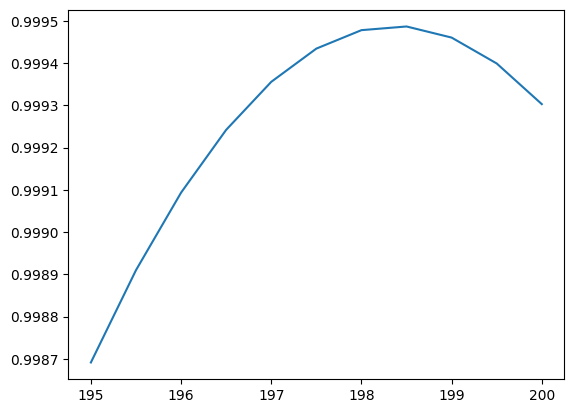

In [10]:
op_name_temp = f0g1_Mode_5_op_name
args = {'Envelope': 'Sine_Squared_Ramp', 'shift': f0g1_StarkShift_Mode5['x'][0], 'epsilon':f0g1_Mode_5_epsilon}


args['Envelope Args'] = {'ramp_time':10}#, 'sigma_factor':2}

#print(op_name_temp)
kwargs = {'save_pulse':True}
Mode35.CalibratePulse('Ramped', f0_Mode_5, g1_Mode_5, args,  195, 200, 11, op_name_temp, kwargs = kwargs)
print(Mode35.op_drive_params_dict[op_name_temp])

### f1g2


#### Mode 3

Target Time: 121.51ns

In [48]:
Mode3.op_drive_params_dict['sb_f_1_Main']

{'Envelope': 'Sine_Squared_Ramp',
 'shift': 0.06047808463525562,
 'epsilon': 0.945,
 'Envelope Args': {'ramp_time': 10, 'pulse_time': 121.66666666666667},
 'freq_d': -2.8697817077805183,
 'pulse_time': 121.66666666666667}

In [49]:
f1_Mode_3 = ['f', 1, 0]
g2_Mode_3 = ['g', 2, 0]
f1g2_Mode_3_op_name = 'sb_f_1_Mode_3'
f1g2_Mode_3_epsilon = 0.78

#Odeoptions = {'nsteps': 10000, 'max_step':1, 'atol':1e-6, 'rtol':1e-6}#, 'method':'bdf'}
#solver_ops = qp.Options(**Odeoptions)
#kwargs = {'shifts':np.linspace(0.03, 0.08, 11), 'show_plot':True, 'options': solver_ops}

In [50]:
#f3g4_StarkShift_Mode3 = Mode35.GetStarkShift(f3_Mode_3, g4_Mode_3, f3g4_Mode_3_epsilon, use_fit = False, kwargs = kwargs)
starkshift = Mode35.op_drive_params_dict['sb_f_0_Mode_3']['shift'] #f3g4_StarkShift_Mode3['x'][0]
#initial_time = 1/f3g4_StarkShift_Mode3['fun']
print(f'stark shift: {starkshift}')
#print(f'Initial Drive Time: {initial_time}')

stark shift: 0.042040532130898874


Doing step 1/31, t = 139.0
10.0%. Run time:   1.99s. Est. time left: 00:00:00:17
20.0%. Run time:   4.06s. Est. time left: 00:00:00:16
30.0%. Run time:   6.14s. Est. time left: 00:00:00:14
40.0%. Run time:   8.24s. Est. time left: 00:00:00:12
50.0%. Run time:  10.38s. Est. time left: 00:00:00:10
60.0%. Run time:  12.54s. Est. time left: 00:00:00:08
70.0%. Run time:  14.66s. Est. time left: 00:00:00:06
80.0%. Run time:  16.76s. Est. time left: 00:00:00:04
90.0%. Run time:  18.87s. Est. time left: 00:00:00:02
Total run time:  21.06s
Transition prob: 0.9960488571899637
-----------------------------------------------------------------

Doing step 2/31, t = 139.2
10.0%. Run time:   1.99s. Est. time left: 00:00:00:17
20.0%. Run time:   4.08s. Est. time left: 00:00:00:16
30.0%. Run time:   6.30s. Est. time left: 00:00:00:14
40.0%. Run time:   8.43s. Est. time left: 00:00:00:12
50.0%. Run time:  10.56s. Est. time left: 00:00:00:10
60.0%. Run time:  12.67s. Est. time left: 00:00:00:08
70.0%. Ru

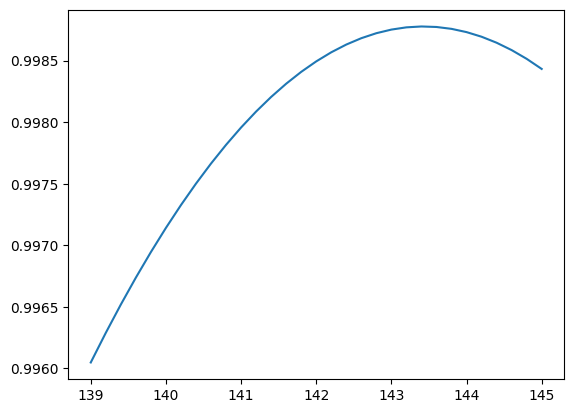

In [51]:
op_name_temp = f1g2_Mode_3_op_name
args = {'Envelope': 'Sine_Squared_Ramp', 'shift': Mode35.op_drive_params_dict['sb_f_0_Mode_3']['shift'], 'epsilon':f1g2_Mode_3_epsilon}


args['Envelope Args'] = {'ramp_time':10}#, 'sigma_factor':2}

#print(op_name_temp)
kwargs = {'save_pulse':True}
Mode35.CalibratePulse('Ramped', f1_Mode_3, g2_Mode_3, args,  139, 145, 31, op_name_temp, kwargs = kwargs)
print(Mode35.op_drive_params_dict[op_name_temp])

#### Mode 5

Target Time: 122.96ns

In [ ]:
Mode5.op_drive_params_dict['sb_f_0_Main']

{'Envelope': 'Sine_Squared_Ramp',
 'shift': 0.05957495001747806,
 'epsilon': 1.38,
 'Envelope Args': {'ramp_time': 10, 'pulse_time': 179.35},
 'freq_d': -2.3774580567588544,
 'pulse_time': 179.35}

In [12]:
f1_Mode_5 = ['f', 0, 1]
g2_Mode_5 = ['g', 0, 2]

f1g2_Mode_5_op_name = 'sb_f_1_Mode_5'

f1g2_Mode_5_epsilon = 1.23

Odeoptions = {'nsteps': 10000, 'max_step':1, 'atol':1e-6, 'rtol':1e-6}#, 'method':'bdf'}
solver_ops = qp.Options(**Odeoptions)
kwargs = {'shifts':np.linspace(0.03, 0.08, 11), 'show_plot':True, 'options': solver_ops}

In [13]:
#f0g1_StarkShift_Mode5 = Mode35.GetStarkShift(f0_Mode_5, g1_Mode_5, f0g1_Mode_5_epsilon, use_fit = False, kwargs = kwargs)
starkshift = Mode35.op_drive_params_dict['sb_f_0_Mode_5']['shift']
#initial_time = 1/f0g1_StarkShift_Mode5['fun']
print(f'stark shift: {starkshift}')
#print(f'Initial Drive Time: {initial_time}')

stark shift: 0.04784470905747803


Doing step 1/21, t = 135.0
10.0%. Run time:   1.90s. Est. time left: 00:00:00:17
20.0%. Run time:   3.92s. Est. time left: 00:00:00:15
30.0%. Run time:   6.00s. Est. time left: 00:00:00:13
40.0%. Run time:   8.05s. Est. time left: 00:00:00:12
50.0%. Run time:  10.11s. Est. time left: 00:00:00:10
60.0%. Run time:  12.20s. Est. time left: 00:00:00:08
70.0%. Run time:  14.26s. Est. time left: 00:00:00:06
80.0%. Run time:  16.32s. Est. time left: 00:00:00:04
90.0%. Run time:  18.38s. Est. time left: 00:00:00:02
Total run time:  20.46s
Transition prob: 0.9886662530833435
-----------------------------------------------------------------

Doing step 2/21, t = 135.5
10.0%. Run time:   1.90s. Est. time left: 00:00:00:17
20.0%. Run time:   4.05s. Est. time left: 00:00:00:16
30.0%. Run time:   6.13s. Est. time left: 00:00:00:14
40.0%. Run time:   8.18s. Est. time left: 00:00:00:12
50.0%. Run time:  10.25s. Est. time left: 00:00:00:10
60.0%. Run time:  12.32s. Est. time left: 00:00:00:08
70.0%. Ru

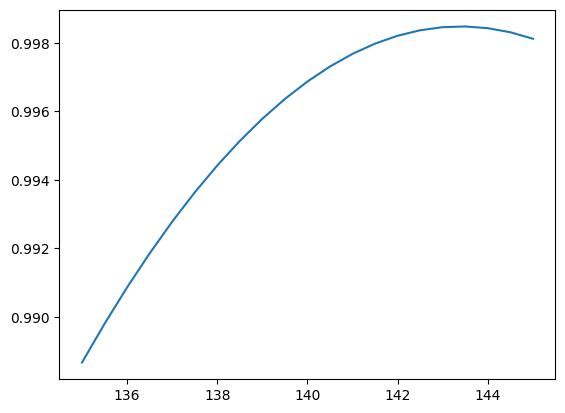

In [16]:
op_name_temp = f1g2_Mode_5_op_name
args = {'Envelope': 'Sine_Squared_Ramp', 'shift': Mode35.op_drive_params_dict['sb_f_0_Mode_5']['shift'], 'epsilon':f1g2_Mode_5_epsilon}


args['Envelope Args'] = {'ramp_time':10}#, 'sigma_factor':2}

#print(op_name_temp)
kwargs = {'save_pulse':True}
Mode35.CalibratePulse('Ramped', f1_Mode_5, g2_Mode_5, args,  135, 145, 21, op_name_temp, kwargs = kwargs)
print(Mode35.op_drive_params_dict[op_name_temp])

### f2g3


#### Mode 3

Target Time: 96.95ns

In [52]:
Mode3.op_drive_params_dict['sb_f_1_Main']

{'Envelope': 'Sine_Squared_Ramp',
 'shift': 0.06047808463525562,
 'epsilon': 0.945,
 'Envelope Args': {'ramp_time': 10, 'pulse_time': 121.66666666666667},
 'freq_d': -2.8697817077805183,
 'pulse_time': 121.66666666666667}

In [53]:
f2_Mode_3 = ['f', 2, 0]
g3_Mode_3 = ['g', 3, 0]
f2g3_Mode_3_op_name = 'sb_f_2_Mode_3'
f2g3_Mode_3_epsilon = 0.78

#Odeoptions = {'nsteps': 10000, 'max_step':1, 'atol':1e-6, 'rtol':1e-6}#, 'method':'bdf'}
#solver_ops = qp.Options(**Odeoptions)
#kwargs = {'shifts':np.linspace(0.03, 0.08, 11), 'show_plot':True, 'options': solver_ops}

In [54]:
#f3g4_StarkShift_Mode3 = Mode35.GetStarkShift(f3_Mode_3, g4_Mode_3, f3g4_Mode_3_epsilon, use_fit = False, kwargs = kwargs)
starkshift = Mode35.op_drive_params_dict['sb_f_0_Mode_3']['shift'] #f3g4_StarkShift_Mode3['x'][0]
#initial_time = 1/f3g4_StarkShift_Mode3['fun']
print(f'stark shift: {starkshift}')
#print(f'Initial Drive Time: {initial_time}')

stark shift: 0.042040532130898874


Doing step 1/31, t = 110.0
10.0%. Run time:   1.06s. Est. time left: 00:00:00:09
20.0%. Run time:   2.16s. Est. time left: 00:00:00:08
30.0%. Run time:   3.26s. Est. time left: 00:00:00:07
40.0%. Run time:   4.36s. Est. time left: 00:00:00:06
50.0%. Run time:   5.46s. Est. time left: 00:00:00:05
60.0%. Run time:   6.68s. Est. time left: 00:00:00:04
70.0%. Run time:   7.78s. Est. time left: 00:00:00:03
80.0%. Run time:   8.88s. Est. time left: 00:00:00:02
90.0%. Run time:   9.97s. Est. time left: 00:00:00:01
Total run time:  11.09s
Transition prob: 0.9808510297628427
-----------------------------------------------------------------

Doing step 2/31, t = 110.5
10.0%. Run time:   1.05s. Est. time left: 00:00:00:09
20.0%. Run time:   2.15s. Est. time left: 00:00:00:08
30.0%. Run time:   3.25s. Est. time left: 00:00:00:07
40.0%. Run time:   4.37s. Est. time left: 00:00:00:06
50.0%. Run time:   5.48s. Est. time left: 00:00:00:05
60.0%. Run time:   6.60s. Est. time left: 00:00:00:04
70.0%. Ru

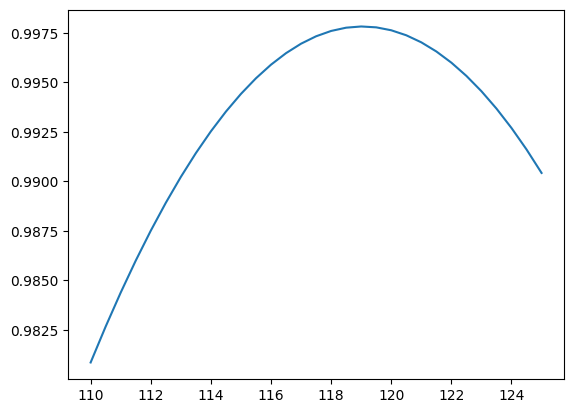

In [55]:
op_name_temp = f2g3_Mode_3_op_name
args = {'Envelope': 'Sine_Squared_Ramp', 'shift': Mode35.op_drive_params_dict['sb_f_0_Mode_3']['shift'], 'epsilon':f2g3_Mode_3_epsilon}


args['Envelope Args'] = {'ramp_time':10}#, 'sigma_factor':2}

#print(op_name_temp)
kwargs = {'save_pulse':True}
Mode35.CalibratePulse('Ramped', f2_Mode_3, g3_Mode_3, args,  110, 125, 31, op_name_temp, kwargs = kwargs)
print(Mode35.op_drive_params_dict[op_name_temp])

#### Mode 5

Target Time: 98.11ns

In [ ]:
Mode3.op_drive_params_dict['sb_f_1_Main']

{'Envelope': 'Sine_Squared_Ramp',
 'shift': 0.06047808463525562,
 'epsilon': 0.945,
 'Envelope Args': {'ramp_time': 10, 'pulse_time': 121.66666666666667},
 'freq_d': -2.8697817077805183,
 'pulse_time': 121.66666666666667}

In [21]:
f2_Mode_5 = ['f', 0, 2]
g3_Mode_5 = ['g', 0, 3]
f2g3_Mode_5_op_name = 'sb_f_2_Mode_5'
f2g3_Mode_5_epsilon = 1.23

#Odeoptions = {'nsteps': 10000, 'max_step':1, 'atol':1e-6, 'rtol':1e-6}#, 'method':'bdf'}
#solver_ops = qp.Options(**Odeoptions)
#kwargs = {'shifts':np.linspace(0.03, 0.08, 11), 'show_plot':True, 'options': solver_ops}

In [22]:
#f3g4_StarkShift_Mode3 = Mode35.GetStarkShift(f3_Mode_3, g4_Mode_3, f3g4_Mode_3_epsilon, use_fit = False, kwargs = kwargs)
starkshift = Mode35.op_drive_params_dict['sb_f_0_Mode_5']['shift'] #f3g4_StarkShift_Mode3['x'][0]
#initial_time = 1/f3g4_StarkShift_Mode3['fun']
print(f'stark shift: {starkshift}')
#print(f'Initial Drive Time: {initial_time}')

stark shift: 0.04784470905747803


Doing step 1/31, t = 110.0
10.0%. Run time:   1.06s. Est. time left: 00:00:00:09
20.0%. Run time:   2.15s. Est. time left: 00:00:00:08
30.0%. Run time:   3.26s. Est. time left: 00:00:00:07
40.0%. Run time:   4.53s. Est. time left: 00:00:00:06
50.0%. Run time:   5.65s. Est. time left: 00:00:00:05
60.0%. Run time:   6.76s. Est. time left: 00:00:00:04
70.0%. Run time:   7.85s. Est. time left: 00:00:00:03
80.0%. Run time:   8.92s. Est. time left: 00:00:00:02
90.0%. Run time:  10.02s. Est. time left: 00:00:00:01
Total run time:  11.14s
Transition prob: 0.980440792707563
-----------------------------------------------------------------

Doing step 2/31, t = 110.66666666666667
10.0%. Run time:   1.07s. Est. time left: 00:00:00:09
20.0%. Run time:   2.18s. Est. time left: 00:00:00:08
30.0%. Run time:   3.29s. Est. time left: 00:00:00:07
40.0%. Run time:   4.40s. Est. time left: 00:00:00:06
50.0%. Run time:   5.53s. Est. time left: 00:00:00:05
60.0%. Run time:   6.63s. Est. time left: 00:00:00:

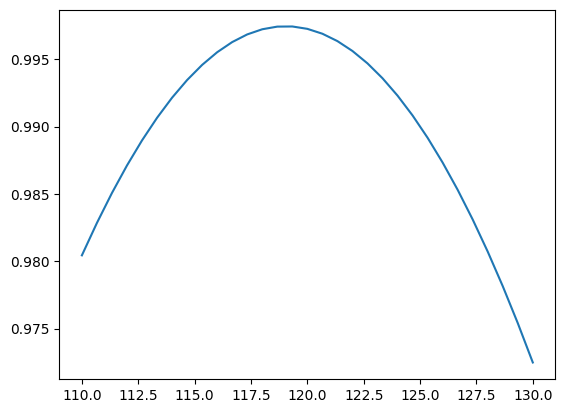

In [23]:
op_name_temp = f2g3_Mode_5_op_name
args = {'Envelope': 'Sine_Squared_Ramp', 'shift': Mode35.op_drive_params_dict['sb_f_0_Mode_5']['shift'], 'epsilon':f2g3_Mode_5_epsilon}


args['Envelope Args'] = {'ramp_time':10}#, 'sigma_factor':2}

#print(op_name_temp)
kwargs = {'save_pulse':True}
Mode35.CalibratePulse('Ramped', f2_Mode_5, g3_Mode_5, args,  110, 130, 31, op_name_temp, kwargs = kwargs)
print(Mode35.op_drive_params_dict[op_name_temp])

### f3g4


#### Mode 3

Target Time: 82.53ns

In [37]:
Mode3.op_drive_params_dict['sb_f_3_Main']

{'Envelope': 'Sine_Squared_Ramp',
 'shift': 0.07339165707463766,
 'epsilon': 1.05,
 'Envelope Args': {'ramp_time': 10, 'pulse_time': 82.4},
 'freq_d': -2.8690511042525344,
 'pulse_time': 82.4}

In [38]:
f3_Mode_3 = ['f', 3, 0]
g4_Mode_3 = ['g', 4, 0]
f3g4_Mode_3_op_name = 'sb_f_3_Mode_3'
f3g4_Mode_3_epsilon = 0.78

Odeoptions = {'nsteps': 10000, 'max_step':1, 'atol':1e-6, 'rtol':1e-6}#, 'method':'bdf'}
solver_ops = qp.Options(**Odeoptions)
kwargs = {'shifts':np.linspace(0.03, 0.08, 11), 'show_plot':True, 'options': solver_ops}

In [56]:
#f3g4_StarkShift_Mode3 = Mode35.GetStarkShift(f3_Mode_3, g4_Mode_3, f3g4_Mode_3_epsilon, use_fit = False, kwargs = kwargs)
starkshift = Mode35.op_drive_param_dict['sb_f_0_Mode_3']['shift']#f3g4_StarkShift_Mode3['x'][0]
#initial_time = 1/f3g4_StarkShift_Mode3['fun']
print(f'stark shift: {starkshift}')
#print(f'Initial Drive Time: {initial_time}')

AttributeError: 'Transmon_Cavity_Model' object has no attribute 'op_drive_param_dict'

Doing step 1/21, t = 100.0
10.0%. Run time:   1.10s. Est. time left: 00:00:00:09
20.0%. Run time:   2.42s. Est. time left: 00:00:00:09
30.0%. Run time:   3.68s. Est. time left: 00:00:00:08
40.0%. Run time:   4.95s. Est. time left: 00:00:00:07
50.0%. Run time:   6.24s. Est. time left: 00:00:00:06
60.0%. Run time:   7.52s. Est. time left: 00:00:00:05
70.0%. Run time:   8.77s. Est. time left: 00:00:00:03
80.0%. Run time:   9.90s. Est. time left: 00:00:00:02
90.0%. Run time:  10.96s. Est. time left: 00:00:00:01
Total run time:  12.20s
Transition prob: 0.9932343972655224
-----------------------------------------------------------------

Doing step 2/21, t = 100.25
10.0%. Run time:   1.10s. Est. time left: 00:00:00:09
20.0%. Run time:   2.37s. Est. time left: 00:00:00:09
30.0%. Run time:   3.65s. Est. time left: 00:00:00:08
40.0%. Run time:   4.96s. Est. time left: 00:00:00:07
50.0%. Run time:   6.26s. Est. time left: 00:00:00:06
60.0%. Run time:   7.54s. Est. time left: 00:00:00:05
70.0%. R

40.0%. Run time:   5.08s. Est. time left: 00:00:00:07
50.0%. Run time:   6.39s. Est. time left: 00:00:00:06
60.0%. Run time:   7.69s. Est. time left: 00:00:00:05
70.0%. Run time:   8.94s. Est. time left: 00:00:00:03
80.0%. Run time:  10.09s. Est. time left: 00:00:00:02
90.0%. Run time:  11.15s. Est. time left: 00:00:00:01
Total run time:  12.20s
Transition prob: 0.9954714338116829
-----------------------------------------------------------------

Doing step 6/21, t = 101.25
10.0%. Run time:   1.13s. Est. time left: 00:00:00:10
20.0%. Run time:   2.42s. Est. time left: 00:00:00:09
30.0%. Run time:   3.71s. Est. time left: 00:00:00:08
40.0%. Run time:   5.01s. Est. time left: 00:00:00:07
50.0%. Run time:   6.30s. Est. time left: 00:00:00:06
60.0%. Run time:   7.62s. Est. time left: 00:00:00:05
70.0%. Run time:   8.88s. Est. time left: 00:00:00:03
80.0%. Run time:  10.02s. Est. time left: 00:00:00:02
90.0%. Run time:  11.09s. Est. time left: 00:00:00:01
Total run time:  12.14s
Transition 

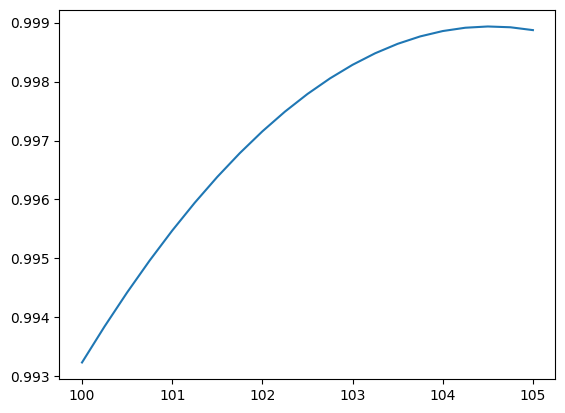

In [ ]:
op_name_temp = f3g4_Mode_3_op_name
args = {'Envelope': 'Sine_Squared_Ramp', 'shift': starkshift = Mode35.op_drive_param_dict['sb_f_0_Mode_3']['shift'], 'epsilon':f3g4_Mode_3_epsilon}


args['Envelope Args'] = {'ramp_time':10}#, 'sigma_factor':2}

#print(op_name_temp)
kwargs = {'save_pulse':True}
Mode35.CalibratePulse('Ramped', f3_Mode_3, g4_Mode_3, args,  100, 110, 21, op_name_temp, kwargs = kwargs)
print(Mode35.op_drive_params_dict[op_name_temp])

#### Mode 5

Target Time: 83.72ns

In [21]:
Mode5.op_drive_params_dict['sb_f_3_Main']

{'Envelope': 'Guassian_Ramp',
 'shift': 0.08825439858166907,
 'epsilon': 1.72,
 'Envelope Args': {'ramp_time': 10, 'sigma_factor': 4, 'pulse_time': 83.4},
 'freq_d': -2.376509378362375,
 'pulse_time': 83.4}

In [24]:
f3_Mode_5 = ['f', 0, 3]
g4_Mode_5 = ['g', 0, 4]

f3g4_Mode_5_op_name = 'sb_f_3_Mode_5'

f3g4_Mode_5_epsilon = 1.23

Odeoptions = {'nsteps': 10000, 'max_step':1, 'atol':1e-6, 'rtol':1e-6}#, 'method':'bdf'}
solver_ops = qp.Options(**Odeoptions)
kwargs = {'shifts':np.linspace(0.05, 0.1, 11), 'show_plot':True, 'options': solver_ops}

In [25]:
#f3g4_StarkShift_Mode5 = Mode35.GetStarkShift(f3_Mode_5, g4_Mode_5, f3g4_Mode_5_epsilon, use_fit = False, kwargs = kwargs)
starkshift = Mode35.op_drive_params_dict['sb_f_0_Mode_5']['shift']
#initial_time = 1/f3g4_StarkShift_Mode5['fun']
print(f'stark shift: {starkshift}')
#print(f'Initial Drive Time: {initial_time}')

stark shift: 0.04784470905747803


Doing step 1/31, t = 90.0
10.0%. Run time:   0.99s. Est. time left: 00:00:00:08
20.0%. Run time:   2.17s. Est. time left: 00:00:00:08
30.0%. Run time:   3.34s. Est. time left: 00:00:00:07
40.0%. Run time:   4.53s. Est. time left: 00:00:00:06
50.0%. Run time:   5.68s. Est. time left: 00:00:00:05
60.0%. Run time:   6.81s. Est. time left: 00:00:00:04
70.0%. Run time:   7.94s. Est. time left: 00:00:00:03
80.0%. Run time:   9.06s. Est. time left: 00:00:00:02
90.0%. Run time:  10.20s. Est. time left: 00:00:00:01
Total run time:  11.38s
Transition prob: 0.9388396153806413
-----------------------------------------------------------------

Doing step 2/31, t = 90.66666666666667
10.0%. Run time:   1.02s. Est. time left: 00:00:00:09
20.0%. Run time:   2.23s. Est. time left: 00:00:00:08
30.0%. Run time:   3.44s. Est. time left: 00:00:00:08
40.0%. Run time:   4.83s. Est. time left: 00:00:00:07
50.0%. Run time:   6.03s. Est. time left: 00:00:00:06
60.0%. Run time:   7.21s. Est. time left: 00:00:00:0

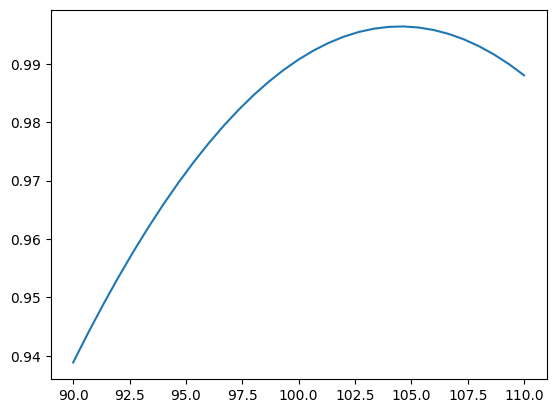

In [28]:
op_name_temp = f3g4_Mode_5_op_name
args = {'Envelope': 'Sine_Squared_Ramp', 'shift': Mode35.op_drive_params_dict['sb_f_0_Mode_5']['shift'], 'epsilon':f3g4_Mode_5_epsilon}


args['Envelope Args'] = {'ramp_time':10}#, 'sigma_factor':2}

#print(op_name_temp)
kwargs = {'save_pulse':True}
Mode35.CalibratePulse('Ramped', f3_Mode_5, g4_Mode_5, args,  90, 110, 31, op_name_temp, kwargs = kwargs)
print(Mode35.op_drive_params_dict[op_name_temp])

## SWAP Pulses

### $|g10\rangle\to|g01\rangle$

#### Floquet Analysis

In [6]:
state_g10 = ['g',1,0]
state_g01 = ['g',0,1]

op_name_g10_SWAP = 'SWAP_g10' 

default_freq_SWAP_g10 = Mode35.DefaultFrequency(['g',1,0], ['g',0,1])/2

print(f'Default Frequency: {default_freq_SWAP_g10}')

Default Frequency: 0.24626148692377825


In [22]:
Odeoptions = {'nsteps': 10000, 'max_step':1, 'atol':1e-6, 'rtol':1e-6}#, 'method':'bdf'}
solver_ops = qp.Options(**Odeoptions)
kwargs = {'shifts':np.linspace(0.03, 0.08, 11)[2:], 'show_plot':True, 'options': solver_ops}

In [23]:
kwargs['shifts']

array([0.04 , 0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 ])

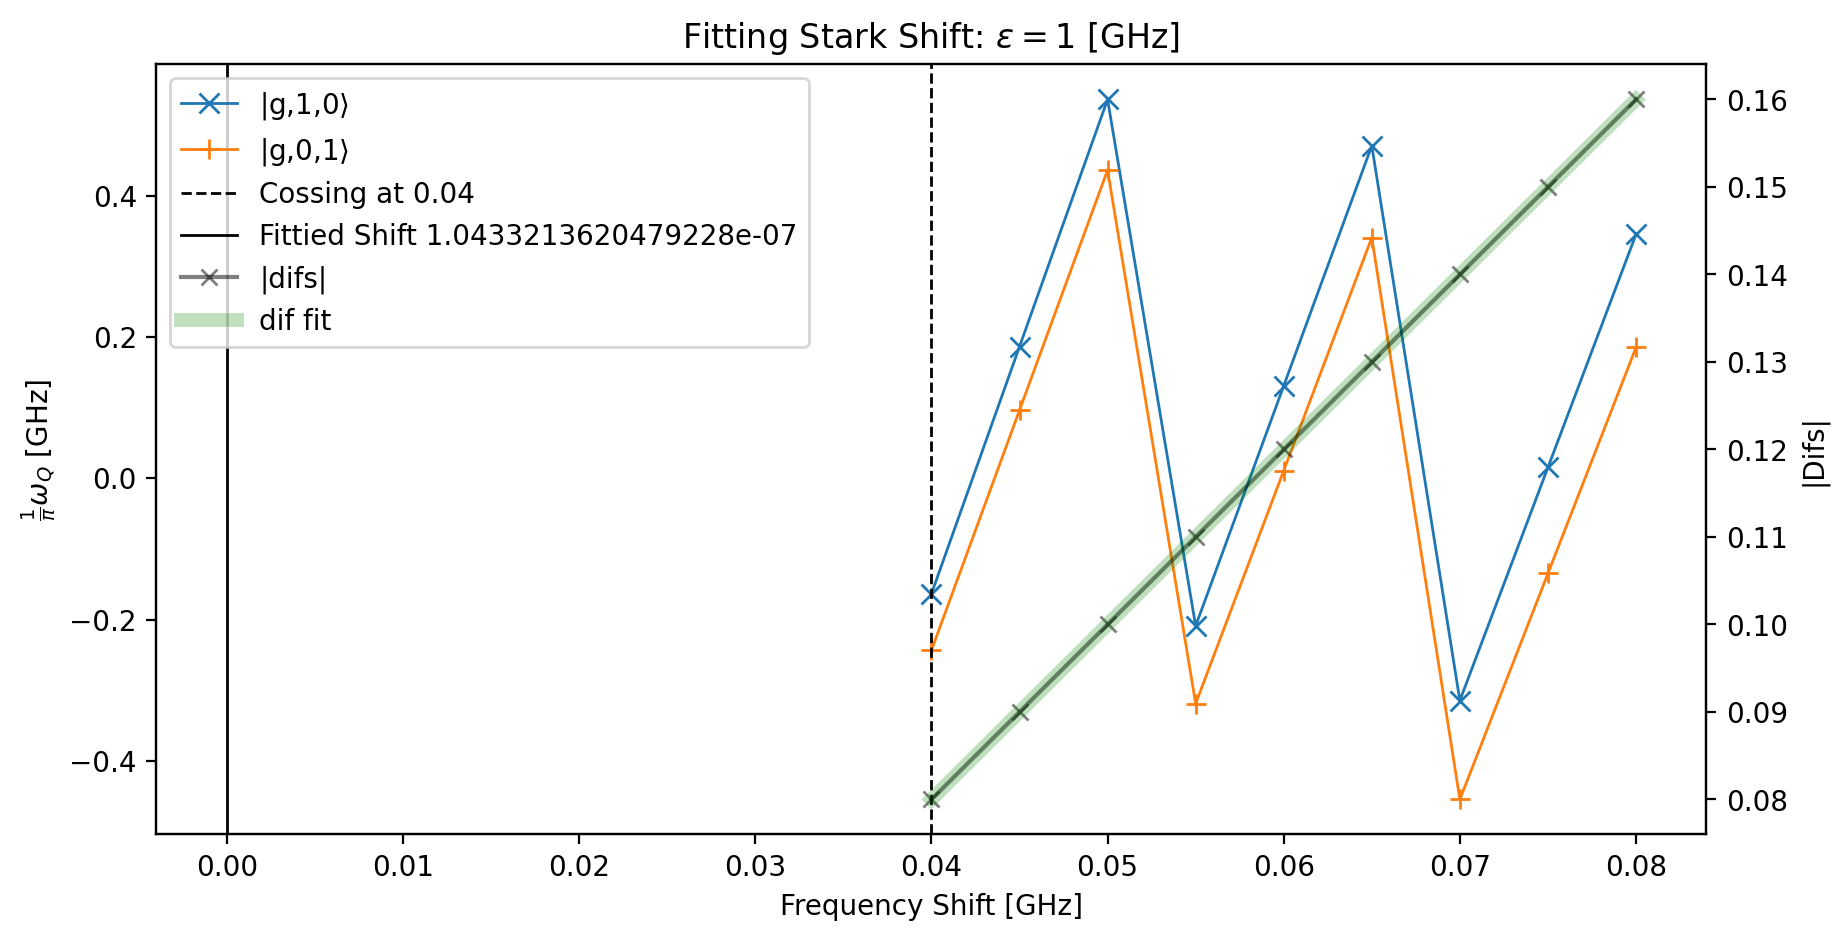

stark shift: 1.0433213620479228e-07
Initial Drive Time: 47163.639053035906


In [24]:
SWAP_g10_Stark_Shift = Mode35.GetStarkShift(state_g10, state_g01, 1, use_fit = False, kwargs = kwargs)
starkshift = SWAP_g10_Stark_Shift['x'][0]
initial_time = 1/SWAP_g10_Stark_Shift['fun']
print(f'stark shift: {starkshift}')
print(f'Initial Drive Time: {initial_time}')

#### Driving State

In [25]:
state_g10 = ['g',1,0]
state_g01 = ['g',0,1]

op_name_g10_SWAP = 'SWAP_g10' 

default_freq_SWAP_g10 = Mode35.DefaultFrequency(['g',1,0], ['g',0,1])/2

print(f'Default Frequency: {default_freq_SWAP_g10}')

Default Frequency: 0.24626148692377825


In [39]:
psi0 = Mode35.get_dressed_state(state_g10)

pulse_args = {'freq_d':default_freq_SWAP_g10, 'epsilon':1.0, 'shift':0, 'pulse_time':500, 'Envelope':'Guassian_Ramp', 'Envelope Args': {'ramp_time':10}}
res = Mode35.Drive_State(psi0=psi0, args = pulse_args)

10.0%. Run time:   9.55s. Est. time left: 00:00:01:25
20.0%. Run time:  18.92s. Est. time left: 00:00:01:15
30.0%. Run time:  28.35s. Est. time left: 00:00:01:06
40.0%. Run time:  37.74s. Est. time left: 00:00:00:56
50.0%. Run time:  47.07s. Est. time left: 00:00:00:47
60.0%. Run time:  56.43s. Est. time left: 00:00:00:37
70.0%. Run time:  65.83s. Est. time left: 00:00:00:28
80.0%. Run time:  75.30s. Est. time left: 00:00:00:18
90.0%. Run time:  84.71s. Est. time left: 00:00:00:09
Total run time:  94.12s


In [40]:
g10_proj = Mode35.get_dressed_state(['g',1,0]).proj()
g01_proj = Mode35.get_dressed_state(['g',0,1]).proj()

g10_prob = []
g01_prob = []

for state in res.states:
    g10_prob.append(qp.expect(g10_proj, state))
    g01_prob.append(qp.expect(g01_proj, state))

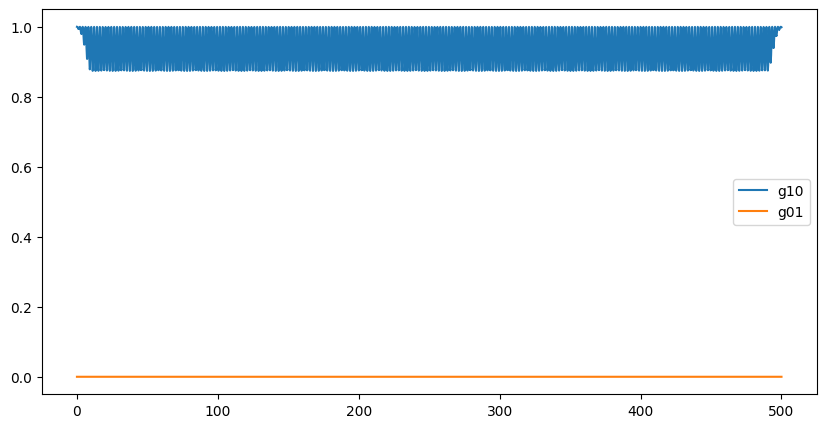

In [41]:
plt.figure(figsize=(10,5))
plt.plot(res.times, g10_prob, label = 'g10')
plt.plot(res.times, g01_prob, label = 'g01')

plt.legend()

# Prepping $|g\rangle\otimes(|N0\rangle + |0N\rangle)$

## Sequence

In [6]:
'q'.split('-')[-1]

'q'

In [1]:
ops = ['q_g_00', 'half-q_e_00', 'sb_f_0_Mode_3', 'q_e_00', 'q_g_00', 'sb_f_0_Mode_5', 'q_e_00', 'q_g_00', 'sb_f_1_Mode_3', 'q_e_00', 'q_g_00', 'sb_f_1_Mode_5','q_e_00', 'q_g_00', 'sb_f_2_Mode_3', 'q_e_00', 'q_g_00', 'sb_f_2_Mode_5','q_e_00', 'q_g_00', 'sb_f_3_Mode_3', 'q_e_00', 'sb_f_3_Mode_5']
#ops = ['q_e_00', 'q_g_00','sb_f_1_Mode_3', 'q_e_00', 'sb_f_1_Mode_5']

#ops = ['sb_f_0_Mode_3', 'q_e_00', 'q_g_00', 'sb_f_0_Mode_5', 'q_e_00', 'q_g_00', 'sb_f_0_Mode_3', 'q_e_00', 'sb_f_0_Mode_5']

In [2]:
for i in range(len(ops)):
    print(f'step {i+1}: {ops[i]}')

step 1: q_g_00
step 2: half-q_e_00
step 3: sb_f_0_Mode_3
step 4: q_e_00
step 5: q_g_00
step 6: sb_f_0_Mode_5
step 7: q_e_00
step 8: q_g_00
step 9: sb_f_1_Mode_3
step 10: q_e_00
step 11: q_g_00
step 12: sb_f_1_Mode_5
step 13: q_e_00
step 14: q_g_00
step 15: sb_f_2_Mode_3
step 16: q_e_00
step 17: q_g_00
step 18: sb_f_2_Mode_5
step 19: q_e_00
step 20: q_g_00
step 21: sb_f_3_Mode_3
step 22: q_e_00
step 23: sb_f_3_Mode_5


## Pulse Plot

10


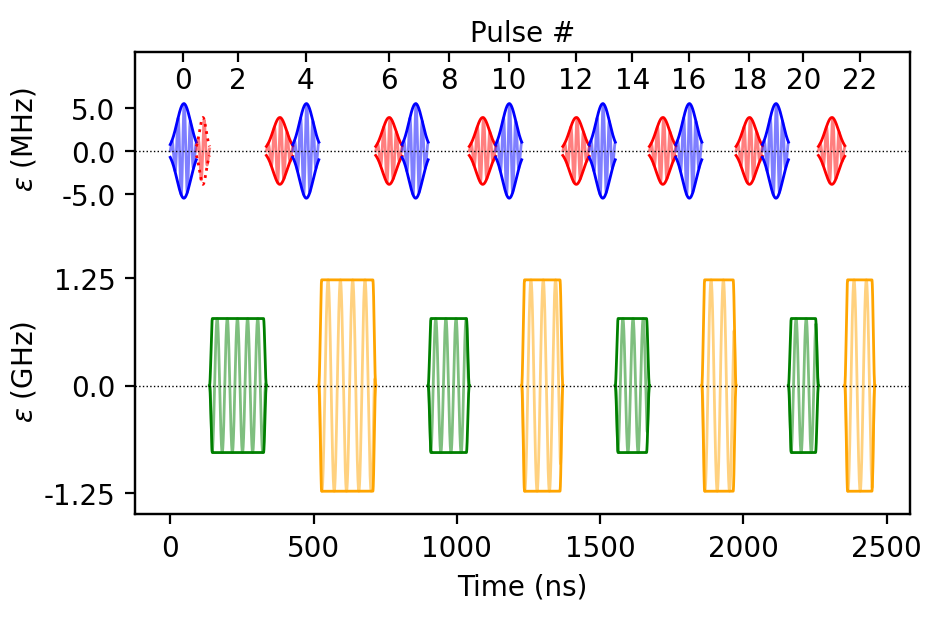

In [55]:
TCMNM.Make_Pulse_Diagram(Mode35, ops, num_label_skip=2, base_offset=1.5, ylim_factor=1.2, q_scale_factor=10, q_yticks = [-0.005, 0, 0.005], sb_yticks = [-1.25, 0, 1.25], wave_factor=100, wave_lw_factor=1)

## State Evolution

### Running

In [11]:
psi0 = Mode35.get_dressed_state(['e',0,0])+Mode35.get_dressed_state(['f',0,0])
psi0 = psi0/psi0.norm()

psi0 = Mode35.get_dressed_state(['g', 0, 0])

Odeoptions = {'nsteps': 1000000, 'max_step':1/1000, 'atol':1e-14, 'rtol':1e-14}
res = Mode35.Run_Pulse_Sequence(psi0, ops, spps = 10, Odeoptions = Odeoptions)


 Doing Gate 1/2 (q_g_00), Gate Time: 91.0
-------------------------------------------------------------------
10.1%. Run time:   1.48s. Est. time left: 00:00:00:13
20.1%. Run time:   2.94s. Est. time left: 00:00:00:11
30.1%. Run time:   4.40s. Est. time left: 00:00:00:10
40.1%. Run time:   5.84s. Est. time left: 00:00:00:08
50.1%. Run time:   7.26s. Est. time left: 00:00:00:07
60.0%. Run time:   8.67s. Est. time left: 00:00:00:05
70.0%. Run time:  10.08s. Est. time left: 00:00:00:04
80.0%. Run time:  11.37s. Est. time left: 00:00:00:02
90.0%. Run time:  12.59s. Est. time left: 00:00:00:01
Total run time:  13.81s

 Doing Gate 2/2 (half-q_e_00), Gate Time: 46.17
-------------------------------------------------------------------
10.2%. Run time:   0.67s. Est. time left: 00:00:00:05
20.1%. Run time:   1.29s. Est. time left: 00:00:00:05
30.0%. Run time:   1.89s. Est. time left: 00:00:00:04
40.2%. Run time:   2.51s. Est. time left: 00:00:00:03
50.1%. Run time:   3.13s. Est. time left: 00:0

 /local/gr400/Git Repositories/Bosonic_Error_Correction/Custom_Packages/Transmon_Cavity_ModelV4_N_Modes.py: 1209

### Fidelity

In [13]:
n = 4

psif = res[1][-1]

psi_n0 = Mode35.get_dressed_state(['g',n, 0])
psi_0n = Mode35.get_dressed_state(['g',0, n])


to_min = lambda phi: 1-qp.fidelity((psi_n0+np.exp(1j*phi[0])*psi_0n)/np.sqrt(2), psif)

min_res = opt.minimize(to_min, x0 = np.array([np.pi/2]), bounds=[(0.0, 2*np.pi)], method='SLSQP')

print(f'Fidelity: {1-min_res.fun}')
print(f'Phase: {min_res.x[0]}')

Fidelity: 1.0658141036401503e-13
Phase: 1.5707963267948966


### Plot

['use_all_states', 'legend_args', 'figsize', 'dpi']
len(t_list): 15, len(psi_list): 15
len(t_list): 15, len(psi_list): 15


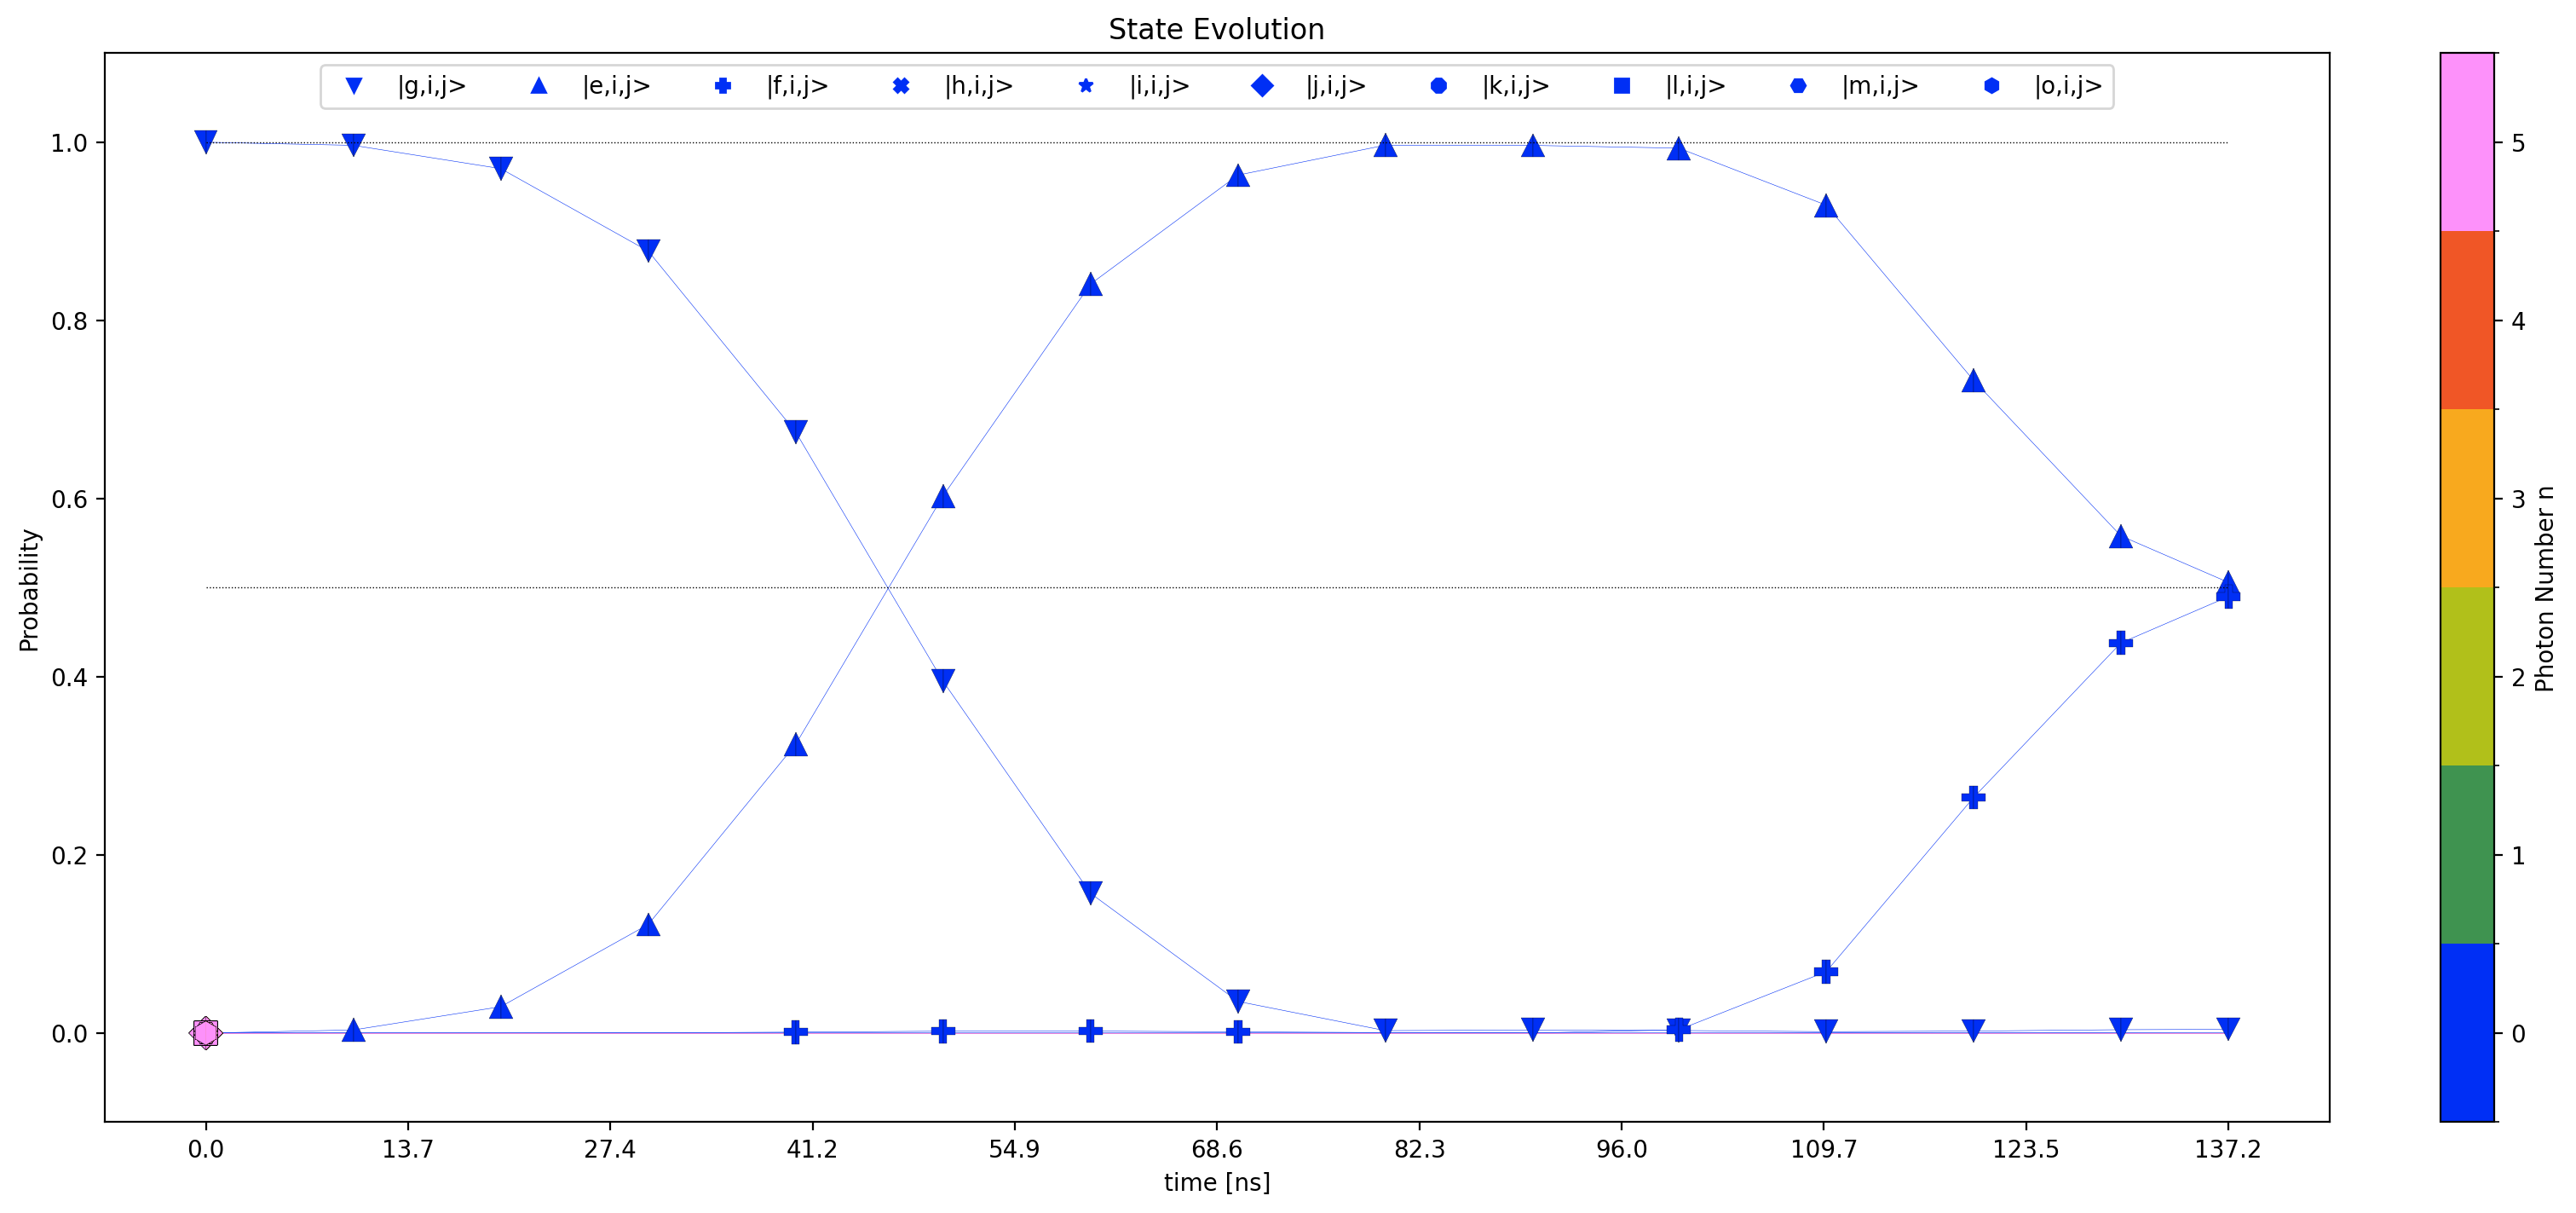

In [14]:
skip = 50
t_list = res[0]#[::skip]
psi_list = res[1]#[::skip]

#TCMNM.Plot_State_Evolution_Two_Modes(Mode35, psi_list, x_axis = t_list, x_ticks = np.linspace(res[0][0], res[0][-1], 10), markersize = 50)

fig_kwargs = {'use_all_states':True, 'legend_args':{'ncol':10, 'loc':'upper center'},'figsize':(30/2,7), 'dpi':200,}
Mode35.Plot_State_Evolution(t_list, psi_list, plot_every = 100, debug = True, fig_kwargs = fig_kwargs)

In [10]:
a = [1,2,3]
a.insert(0, 0)

In [11]:
a

[0, 1, 2, 3]